<a href="https://colab.research.google.com/github/sraeisi/Machine_Learning_Physics_Winter20/blob/master/Chpt3/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from google.colab import files
import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size




import warnings
warnings.filterwarnings('ignore')



# Data

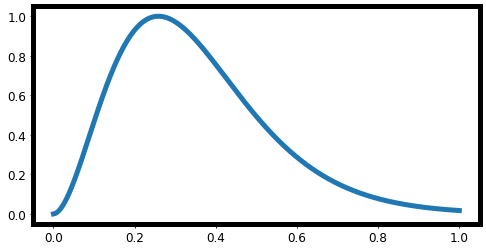

In [94]:
bbr_data_url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Lec_1/bbr.xls?raw=true"

bbr_data = pd.read_excel(bbr_data_url)

# bbr_data = pd.read_excel('bbr.xls')

data = bbr_data[[0,'T']]

# data.head()



X = data[0]
Y = data['T']

from sklearn.preprocessing import minmax_scale
X = minmax_scale(X.values.reshape(-1,1) )
Y = minmax_scale(Y.values.reshape(-1,1) )
# X = StandardScaler().fit_transform( X.values.reshape(-1,1) )


plt.plot(X,Y)
plt.show()

# Overfitting and underfitting 

578
193


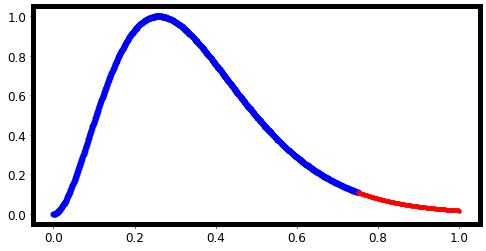

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=False)
print( len(X_train) )
print( len(X_test ) )
plt.scatter(X_train, Y_train, color = 'b')
plt.scatter(X_test, Y_test, color = 'r', s = 10)

## Reminder

This is the result of training with 6 points.



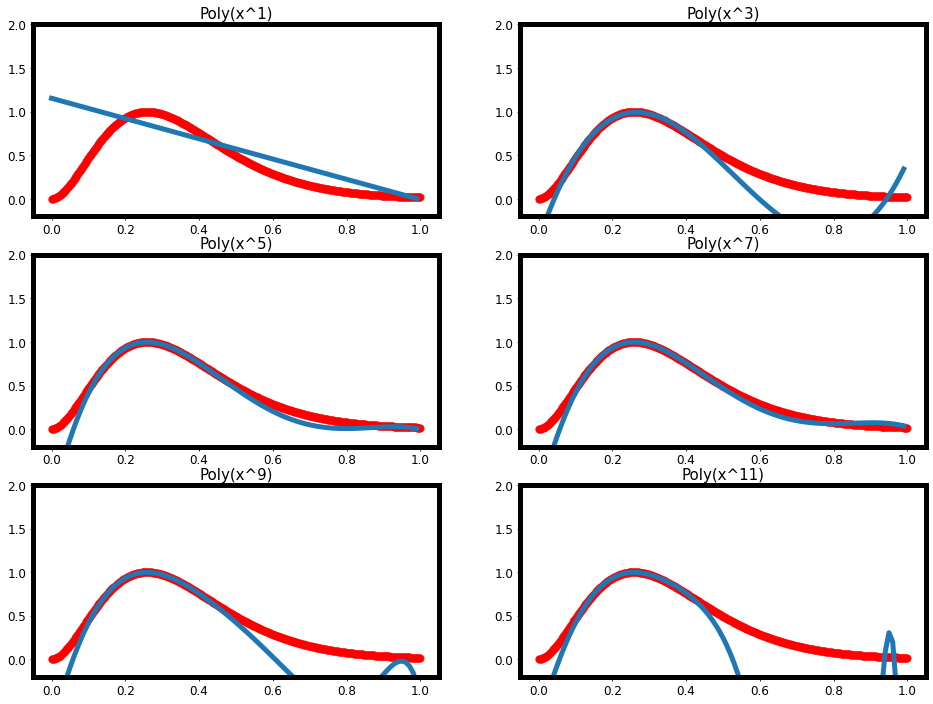

In [69]:
n_rate = 100   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')


from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X, Y, s = 50, c = 'r', alpha =.5)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list)

### Randomness helps

This is the result with 6.



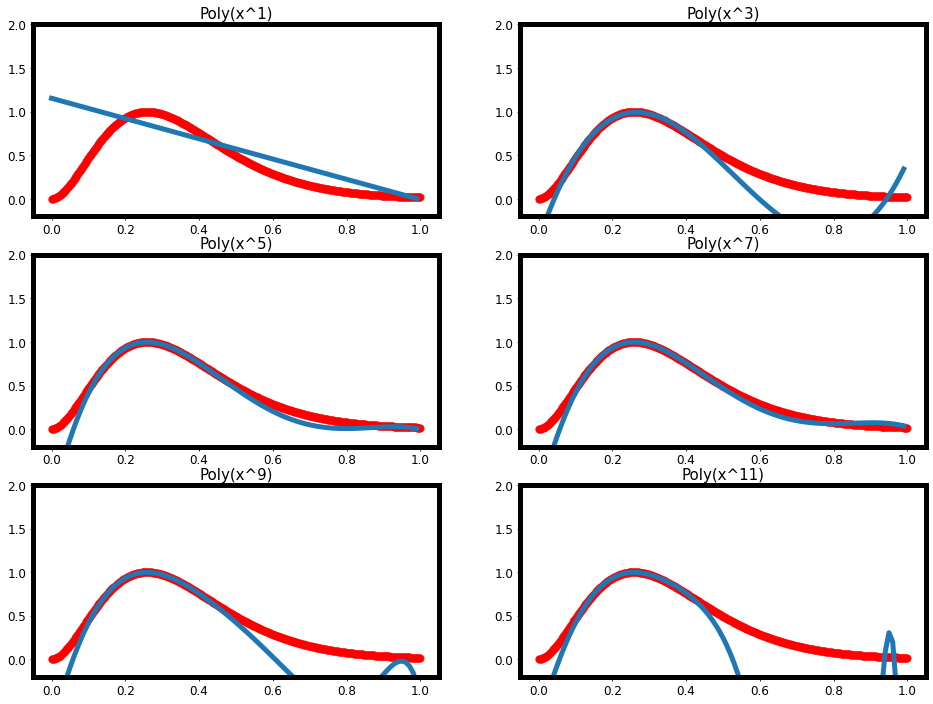

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)


n_rate = 100   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')

from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X, Y, s = 50, c = 'r', alpha =.5)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list)

## But what helps most is more "data".

This is the result of training with 12 points.



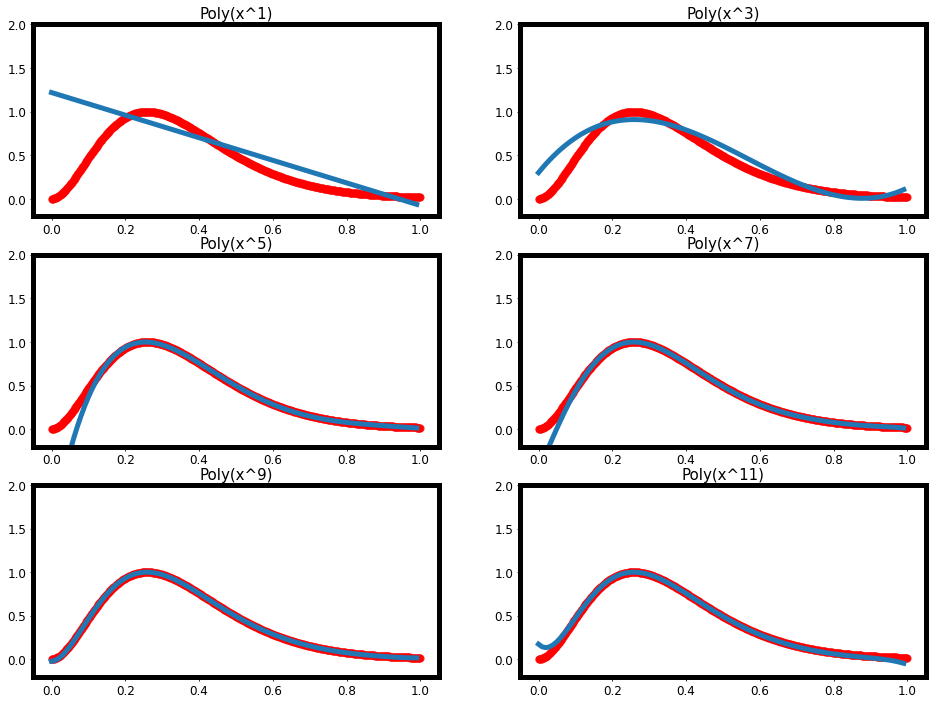

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)


n_rate = 50   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')

from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X, Y, s = 50, c = 'r', alpha =.5)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list)

Just doubling the number of points from 6 to 12 lead to much more acceptable results. However, if we go for higher orders polynomial, we will still get poor results. 

So it is important to see how the model complexity/nonlinearity and also the size of the data contributes to the overall performance of the model. 

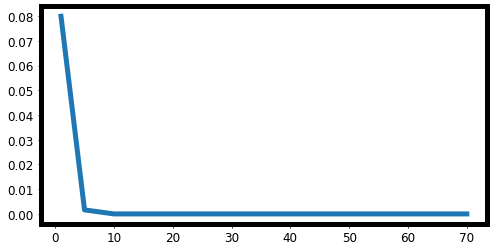

In [75]:
# from sklearn.metrics import mean_squared_error

# from sklearn.linear_model import LinearRegression
## Let's try different models for different number of points. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)

n_rate = 100   #We only keep a subset of the points, every n_rate points. 
title = len(X_train[::n_rate])

deg_list = [1,5,10,15,20,50,70]
mse_list = []
for deg in deg_list:
  ## Generate the polydegree of the training data. 
  X_d = poly_features(X_train, deg) 

  ## Fit the model with the data
  reg = LinearRegression().fit(X_d, Y_train)

  Y_predicted = reg.predict(poly_features(X_test, deg) ) 

  mse_list +=[mean_squared_error(Y_test, Y_predicted)  ]

plt.plot(deg_list, mse_list)


In [74]:
print(mse_list)

[0.07992788031051667, 0.001627674930899016, 2.74836215477492e-08, 1.3182749549377789e-13, 3.874708069998054e-18, 2.0019564947172283e-18, 8.950819905469325e-19]


Bias and Variance Trade-off
==
Often, we our first toy model or estimator does not return a good accuracy and we need to play around and figure out what we need to change. The first two natural questions are 

- Is the model that we are trying good enough to capture the behviour of our data?
- Do we have enough data

Here we describe a procedure that helps us find the answers to these questions and systematically choose the right model and find a good set of hyper-parameters for our model.

The main tools we need for this part come from statistical learning. Namely we will go through the concept of Bias and Variance and the trade-off between them. We then use ''learning curve' and 'validation curve' to get a sense of how much data we need and how complex we should make our model. 

We will introduce some more tools later. 

In [0]:
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss


In [88]:
%%time
poly_scores = []


polytransform = PolynomialFeatures( degree=2 )
# bbr_reg_poly = LinearRegression(n_jobs=-1)
bbr_reg_poly = Ridge()


n_tot = int(len(data) )    ## Total number of samples
n_points = 25              ## Number of points for the learning curve plot
ns_list = np.arange(int(n_tot/n_points)-1,n_tot , int(n_tot/n_points) )      ## x-axis on the learning curve
n_avg = 200                ## Number of times to average

for ns in ns_list:        ## For different subset-sizes we try training our estimator
  e_in = 0
  e_out = 0               ## For each, we record the in and out score. 
  for i in range(n_avg):
    
    sample_data = data.sample(ns)
    X_train, X_test, Y_train, Y_test = train_test_split(sample_data[0].values.reshape(-1,1), sample_data['T'], random_state = 0)

    bbr_reg_poly.fit(       polytransform.fit_transform( X_train )      , Y_train )

    e_in  += mean_squared_error( Y_train, bbr_reg_poly.predict(polytransform.fit_transform( X_train ) ) )
    e_out += mean_squared_error( Y_test , bbr_reg_poly.predict(polytransform.fit_transform( X_test ) )  )
  
  poly_scores += [[e_in/n_avg, e_out/n_avg]]

  
poly_scores = np.array(poly_scores)  

CPU times: user 13.3 s, sys: 18.6 ms, total: 13.3 s
Wall time: 13.3 s


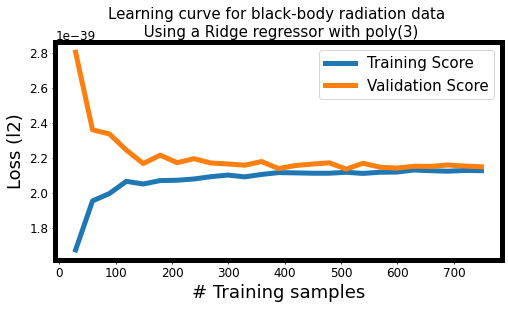

In [78]:
xlabel = '# Training samples'
ylabel = 'Loss (l2)'
plt_title = 'Learning curve for black-body radiation data \n Using a Ridge regressor with poly(3)'
fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, poly_scores[:,0], label = 'Training Score')
ax2.plot(ns_list, poly_scores[:,1], label = 'Validation Score')
ax2.legend(loc=0)


plt.show()

In [84]:
%%time
svr_scores = []

X = data[0].values.reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
Y = data['T'].values/data['T'].mean()

opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR
svr = SVR(**opt_svr_param  )

svr = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )

n_tot = int(len(data) )
n_points = 10
# ns_list = np.arange(int(n_tot/n_points)-1,n_tot , int(n_tot/n_points) )
ns_list=np.array([ 2, 5, 10, 20 , 30 , 50, 76, 153, 307, 538, 615])
n_avg = 200

for ns in ns_list:
  e_in = 0
  e_out = 0
  for i in range(n_avg):
    
    sample_data = data.sample(ns)
    ## We'll come back to why we do the following scaling. 
    X = sample_data[0].values.reshape(-1,1)
    X = scaler.transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split( X , sample_data['T']/sample_data['T'].mean(), random_state = 0)

    
    svr.fit(X_train,Y_train)
    e_in  += mean_squared_error(  Y_train, svr.predict(X_train )  )
    e_out += mean_squared_error(  Y_test,  svr.predict(X_test  )  )
  
  svr_scores += [[e_in/n_avg, e_out/n_avg]]

svr_scores = np.array(svr_scores)  

CPU times: user 14.1 s, sys: 10.4 ms, total: 14.1 s
Wall time: 14.1 s


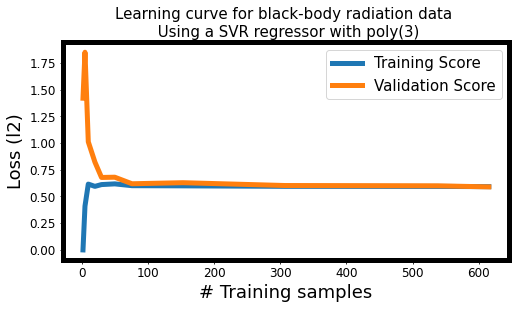

In [85]:
plt_title = 'Learning curve for black-body radiation data \n Using a SVR regressor with poly(3)'

fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, svr_scores[:,0], label = 'Training Score')
ax2.plot(ns_list, svr_scores[:,1], label = 'Validation Score')
ax2.legend(loc=0)
plt.show()

## How to do this in sklearn

In [0]:
from sklearn.model_selection import learning_curve, validation_curve

In [97]:
len(X)

771

In [0]:


train_sizes = [1, 2, 5, 7, 10, 15, 25, 50, 100, 200, 500]

ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = SVR(**opt_svr_param), X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [104]:
print('Training scores:\n\n', pd.DataFrame( train_scores) )
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

            0             1             2             3             4
0  -0.000000 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00
1  -0.000002 -4.259824e-08 -4.259824e-08 -4.259824e-08 -4.259824e-08
2  -0.000018 -1.428104e-06 -1.428104e-06 -1.428104e-06 -1.428104e-06
3  -0.000034 -4.690039e-06 -4.690039e-06 -4.690039e-06 -4.690039e-06
4  -0.000063 -1.762891e-05 -1.762891e-05 -1.762891e-05 -1.762891e-05
5  -0.000120 -7.832702e-05 -7.832702e-05 -7.832702e-05 -7.832702e-05
6  -0.000215 -4.727497e-04 -4.727497e-04 -4.727497e-04 -4.727497e-04
7  -0.000149 -4.048259e-03 -4.048259e-03 -4.048259e-03 -4.048259e-03
8  -0.000423 -1.088499e-02 -1.088499e-02 -1.088499e-02 -1.088499e-02
9  -0.000159 -1.363092e-03 -9.327240e-04 -9.327240e-04 -9.327240e-04
10 -0.000054 -6.415783e-04 -2.951876e-04 -3.306626e-04 -3.290586e-04

 ----------------------------------------------------------------------

Validation scores:

            0         1         2         3         4
0  -0

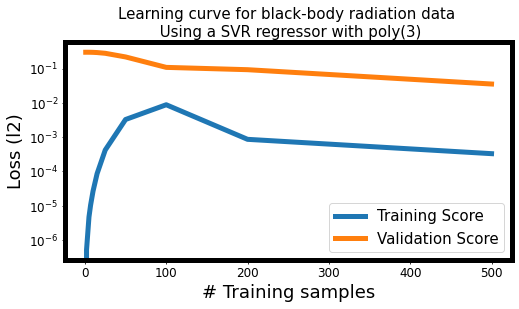

In [105]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')
ax.legend(loc=0)
plt.yscale('log')

plt.show()

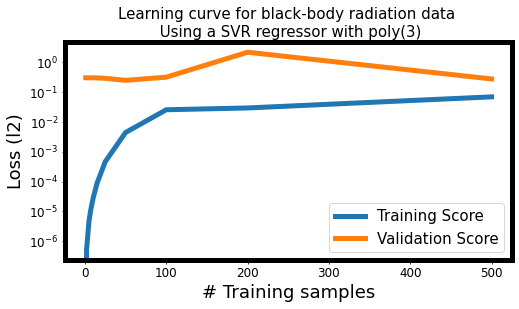

In [111]:
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = Ridge(), X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5,
                                                  scoring = 'neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')
plt.yscale('log')
ax.legend(loc=0)
plt.show()

## Classification

In [112]:
#https://drive.google.com/file/d/17UKL0GGf9VljROIaG3UMa6lVl3rWYAtc/view

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

targets = list(set(data['id']))
data['target'] = data['id'].apply(lambda x: targets.index(x)) 
data.drop('id',axis=1, inplace=True)

data.head()

,p,theta,beta,nphe,ein,eout,target
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,1
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,1
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,2
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,1
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,2


In [0]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [117]:
ns_tot=5000
features = data.columns[ [0, 1,2,3,4,5] ]
ind_1 = 1
ind_2 = 2
data = data[ (data['target']==ind_1) | (data['target']==ind_2) ]

m_data = data.sample(ns_tot)

X_train, X_test, Y_train, Y_test = train_test_split(m_data[features], m_data['target'], random_state = 0)

svc_clf = SVC().fit(X_train,Y_train)
print('SVC gives a score of {} on training data and \n {} on test data.'.format(svc_clf.score(X_train, Y_train ),svc_clf.score(X_test, Y_test )  )  )

knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)
print('knn gives a score of {} on training data and \n {} on test data.'.format(knn_clf.score(X_train, Y_train ),knn_clf.score(X_test, Y_test )  )  )


SVC gives a score of 0.6261333333333333 on training data and 
 0.6184 on test data.
knn gives a score of 0.9696 on training data and 
 0.9512 on test data.


In [115]:
%%time
svc_scores = []
knn_scores = []


svc_clf = SVC()
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)


n_tot = 10000 #int(len(data)/100 )    ## Total number of samples
n_points = 15              ## Number of points for the learning curve plot
ns_list = [.1, .2, .3, .4, .5, .6, .7, .8, .9]     ##Fraction of the data to keep for training, the x-axis on the learning curve
n_avg = 20                ## Number of times to average

for ns in ns_list:        ## For different subset-sizes we try training our estimator
  svc_e_in = 0
  svc_e_out = 0               ## For each, we record the in and out score. 
  print(ns)

  for i in range(n_avg):
    sample_data = m_data.sample(frac=ns)
    X_train, X_test, Y_train, Y_test = train_test_split(sample_data[features], sample_data['target'], random_state = 0)

    svc_clf.fit(X_train,Y_train)
    
    svc_e_in  += svc_clf.score(X_train, Y_train )
    svc_e_out += svc_clf.score(X_test, Y_test )
  
  svc_scores += [[svc_e_in/n_avg, svc_e_out/n_avg]]

   


  
svc_scores = np.array(svc_scores)  


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
CPU times: user 51.3 s, sys: 106 ms, total: 51.4 s
Wall time: 51.4 s


In [120]:
print(svc_scores)


[[0.6148     0.5964    ]
 [0.61046667 0.6044    ]
 [0.61991111 0.60693333]
 [0.618      0.6157    ]
 [0.62626667 0.60968   ]
 [0.63217778 0.62713333]
 [0.63466667 0.62897143]
 [0.63993333 0.64155   ]
 [0.65317037 0.64924444]]


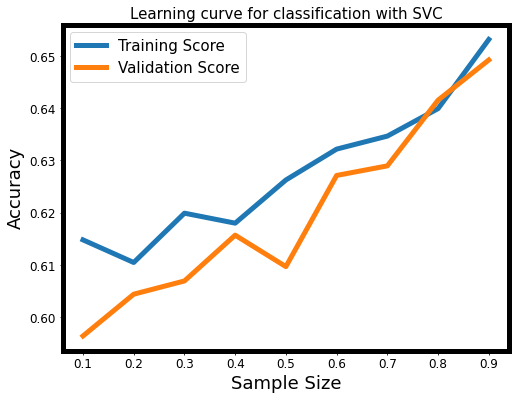

In [121]:
fig = plt.figure(figsize=(8,6))
xlabel = 'Sample Size'
ylabel = 'Accuracy'

svc_title = 'Learning curve for classification with SVC'

ax1 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=svc_title)

ax1.plot(ns_list, svc_scores[:,0], label = 'Training Score')
ax1.plot(ns_list, svc_scores[:,1], label = 'Validation Score')
ax1.legend(loc=0)



plt.show()

In [0]:
from sklearn.utils import shuffle
df = shuffle(m_data)

X = m_data[features]
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

Y = m_data['target']



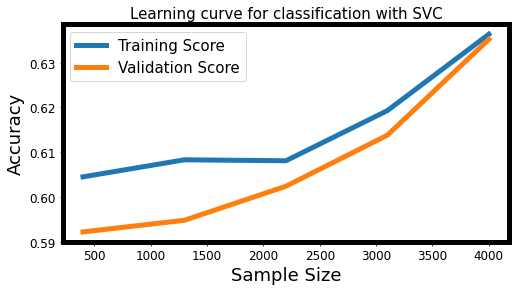

In [123]:
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = SVC(), X = X,
                                                   y = Y,  cv = 5,
                                                   scoring = 'accuracy', random_state=11)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

xlabel = 'Sample Size'
ylabel = 'Accuracy'

svc_title = 'Learning curve for classification with SVC'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=svc_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')
# plt.yscale('log')
ax.legend(loc=0)
plt.show()

In [124]:
print('Training scores:\n\n', pd.DataFrame( train_scores) )
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

           0         1         2         3         4
0  0.642500  0.595000  0.595000  0.595000  0.595000
1  0.613846  0.613846  0.604615  0.604615  0.604615
2  0.597273  0.609091  0.614091  0.610000  0.610000
3  0.616774  0.625484  0.629355  0.612903  0.611935
4  0.628500  0.644250  0.649000  0.620000  0.640000

 ----------------------------------------------------------------------

Validation scores:

        0      1      2      3      4
0  0.595  0.591  0.589  0.596  0.590
1  0.595  0.595  0.594  0.595  0.595
2  0.596  0.610  0.611  0.597  0.598
3  0.612  0.612  0.617  0.622  0.606
4  0.628  0.623  0.638  0.646  0.641


In [0]:
from sklearn.linear_model import SGDClassifier

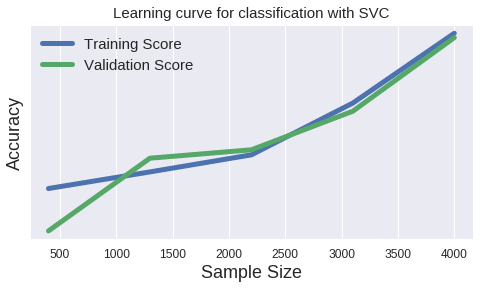

In [0]:
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = SGDClassifier(), X = X,
                                                   y = Y,  cv = 5,
                                                   scoring = 'accuracy', random_state=11)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

xlabel = 'Sample Size'
ylabel = 'Accuracy'

svc_title = 'Learning curve for classification with SVC'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=svc_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')
plt.yscale('log')
ax.legend(loc=0)
plt.show()